# **Transformación de datos**

Se realizará la transformación de datos numericos y categoricos

## **Escalamiento de Datos numéricos**

se realiza el escalamiento por transformación lineal (para dataset uniformes y simetricos)

Se realiza el escalamiento por transformación no lineal (para datos sesgados o no uniformes)


### **Transformación lineal**

Se realizará la transformación por los metodos max_min y zscore

In [2]:
#se importan las librerias requeridas.

import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Se importa los datasets de la libreria scikit-learn
## para instalar la libreria 
## conda install -c conda-forge scikit-learn

from sklearn import datasets, linear_model
X, y =datasets.load_diabetes(return_X_y=True)
raw=X[:, None, 2]

In [5]:
# Reglas de escalamiento:

max_raw= max(raw)
min_raw=min(raw)
transformacion_lineal_max_min = (2*raw-min_raw-max_raw)/(max_raw-min_raw)

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

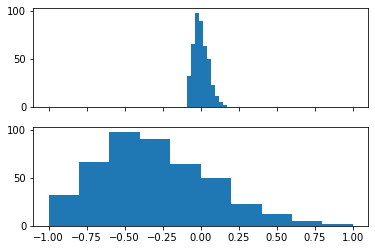

In [11]:
#distribución de los datos originales y escalados, compartiendo el eje X

fig, axs = plt.subplots(2,1, sharex = True, sharey = True)
axs[0].hist(raw)
axs[1].hist(transformacion_lineal_max_min)

In [12]:
# modelos para entrenamiento

def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_escalada():
    linear_model.LinearRegression().fit(transformacion_lineal_max_min, y)

In [14]:
raw_time=timeit.timeit(train_raw, number= 100)
scaled_time=timeit.timeit(train_escalada, number= 100)
print("Tiempo de entrenamiento de los datos crudos: {}".format(raw_time))
print("Tiempo de entrenamiento de los datos escalados: {}".format(scaled_time))


Tiempo de entrenamiento de los datos crudos: 0.09864389999984269
Tiempo de entrenamiento de los datos escalados: 0.07135490000018763


Con el analisis del tiempo de entrenamiento del modelo de regresión lineal para los datos crudos `RAW`, se evidencia que se genera una optimización del tiempo de ejecución cuando se escalan los datos.  

## **Ejercicio:**

Realizar el calculo del tiempo de entrenamiento pero realizando la transformación lineal `zscore` 

Tiempo de entrenamiento de los datos crudos: 0.09864389999984269
Tiempo de entrenamiento de los datos escalados: 0.05012059999990015


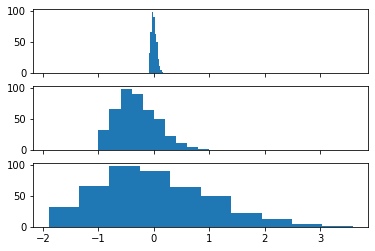

In [16]:
media=raw.mean()
std=raw.std()
zscore=(raw-media)/std

fig, axs = plt.subplots(3,1, sharex = True, sharey = True)
axs[0].hist(raw)
axs[1].hist(transformacion_lineal_max_min)
axs[2].hist(zscore)

def train_zscore():
    linear_model.LinearRegression().fit(zscore, y)

raw_time2=timeit.timeit(train_raw, number= 100)
zscore_time=timeit.timeit(train_zscore, number= 100)
print("Tiempo de entrenamiento de los datos crudos: {}".format(raw_time))
print("Tiempo de entrenamiento de los datos escalados: {}".format(zscore_time))

### **Transformación no lineal**

Se realizará la transformación con la tangente hiperbolica.

<AxesSubplot:>

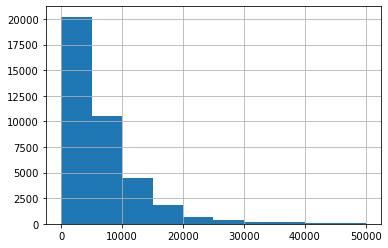

In [3]:
df = pd.read_csv("./notas/cars.csv")
df.price_usd.hist()


<AxesSubplot:>

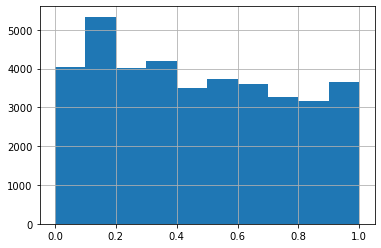

In [18]:
p=10000
tanh=df.price_usd.apply(lambda x: np.tanh(x/p))
tanh.hist()


## **Escalamiento de datos categoricos**

Se realizará el mapeo numerico por los métodos *dummy* y *one-hot* 

In [4]:
#onehot en pandas, llamado erroneamente dummy

pd.get_dummies(df["engine_type"])

,diesel,electric,gasoline
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
38526,0,0,1
38527,1,0,0
38528,0,0,1
38529,0,0,1


In [13]:
#one hot con la libreria scikit-learn

import sklearn.preprocessing as preprocessing
encoder = preprocessing.OneHotEncoder(handle_unknown="ignore")

encoder.fit(df[["engine_type"]].values)

encoder.transform([["gasoline"],["diesel"],["aceite"]]).toarray()

encoder.fit(df[["year_produced"]].values)
encoder.transform([[2016],[2009],[1900]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
# calculo del coeficiente de correlación de dos valiables
import seaborn as sns
from sklearn.preprocessing import StandardScaler
iris = sns.load_dataset("iris")
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
mean=iris["sepal_length"].mean()
std=iris["sepal_length"].std()

print(mean,std)

(5.1-mean)/std

5.843333333333335 0.8280661279778629


-0.8976738791967672

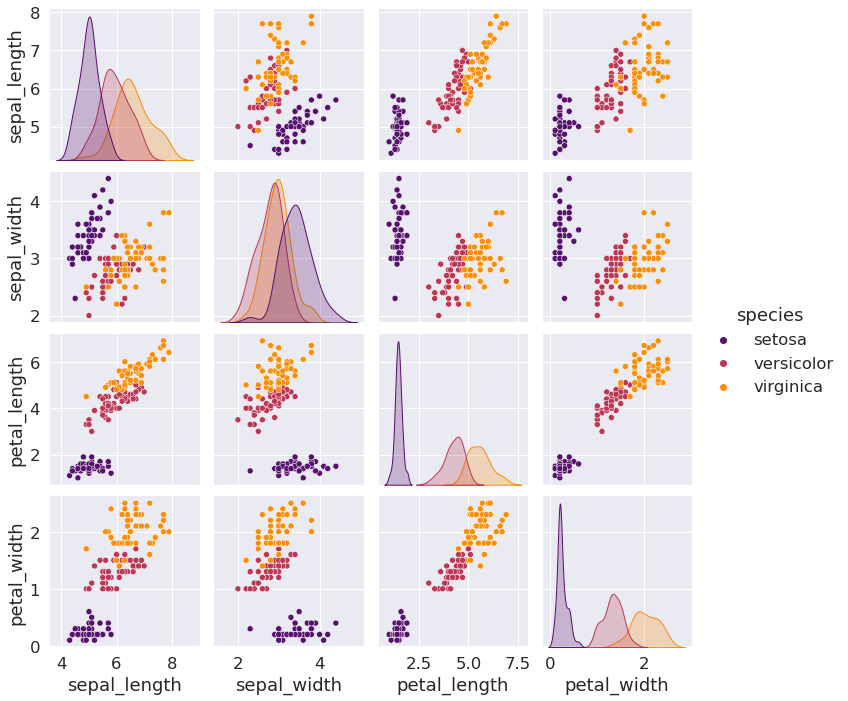

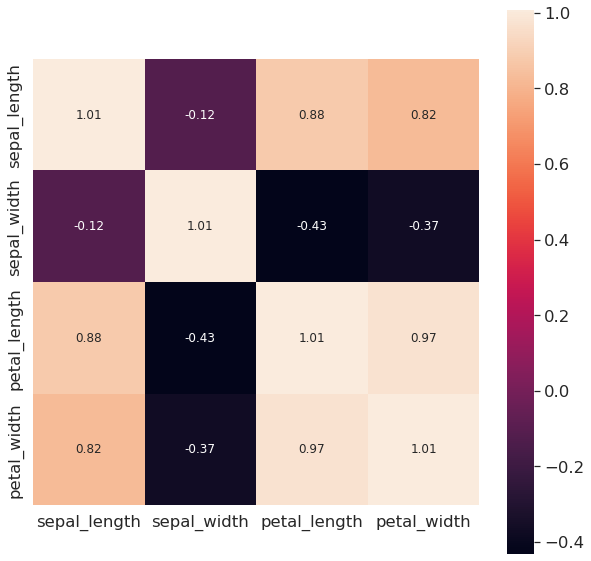

In [36]:
# 1. se crea la matriz de graficos de dispersión
sns.pairplot(iris, hue="species", palette="inferno")

# transfomación numerica 

scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)

scaled.T

#se calcula la matriz de covariancia.

covariance_matrix= np.cov(scaled.T)

## se muestra la matriz de covirianza como un grafico.

plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm=sns.heatmap(
    covariance_matrix, 
    cbar=True,
    annot=True,
    square=True,
    fmt=".2f",
    annot_kws={"size": 12},
    yticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
    xticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
)